<a href="https://colab.research.google.com/github/haidaraf6/My-Project/blob/main/Segmentasi_Penyakit_pada_Citra_Daun_Tomat_dengan_Metode_K_Means_Cluster_melalui_Ruang_Warna_HSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimport Library

import numpy as np
import pandas as pd
import cv2 as cv

import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")

from statistics import mode
from skimage import io
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image
import seaborn as sns; sns.set()

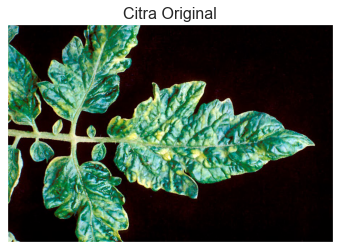

In [ ]:
# Mengimport Citra Daun Tomat Berpenyakit dengan Asumsi Bahwa pada Tepian Citra Hanya Background

# daun = imread("C:\\Users\\super\\Downloads\\septoria-leaf-spot.jpg")
# daun = imread("C:\\Users\\super\\Downloads\\tomato-septoria-leaf-spot-grabowski.jpg")
# manual = imread("C:\\Users\\super\\Downloads\\tomato-septoria-leaf-spot-manual.jpg")
# manual = imread("C:\\Users\\super\\Downloads\\septoria-leaf-spot2-manual.jpg")

daun = imread("C:\\Users\\super\\Downloads\\tomato-mosaic-virus.jpg")
# daun = imread("C:\\Users\\super\\Downloads\\mosaic.jpg")
manual = imread("C:\\Users\\super\\Downloads\\tomato-mosaic-virus-manual.jpg")
# manual = imread("C:\\Users\\super\\Downloads\\mosaicvirus-2-manual.jpg")

# daun = imread("C:\\Users\\super\\Downloads\\bacterial-leaf-spot.jpg")
# daun = imread("C:\\Users\\super\\Downloads\\bacterialspot.jpg")
# manual = imread("C:\\Users\\super\\Downloads\\bacterial-leaf-spot-manual.png")
# manual = imread("C:\\Users\\super\\Downloads\\bacterialspot-2-manual.jpg")

# Menampilkan Citra Daun Tomat Berpenyakit
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(daun);
ax.set_title('Citra Original', size=16);

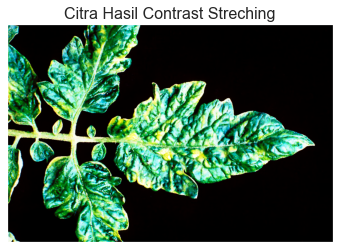

In [ ]:
# Preprocessing Citra (Melakukan Contras Streching)
contrass_image = daun
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
contrass_image = cv.LUT(contrass_image, table)

# Menampilkan Citra Hasil Contrass Streching
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(contrass_image);
ax.set_title('Citra Hasil Contrast Streching', size=16);

In [ ]:
# Melakukan Normalisasi Citra
norm_image = contrass_image / 255.0

# Mendefinisikan Baris dan Kolom Citra
baris = norm_image.shape[0]
kolom = norm_image.shape[1]

# Mengubah Ukuran Citra
norm_image = norm_image.reshape(baris*kolom, 3)
manual = cv.resize(manual,(kolom,baris))

In [ ]:
# Membuat Fungsi Untuk Memvisualisasikan Persebaran Warna Citra Melalui Scatter Plot
def plot_pixels(daun, title, colors=None, N=10000):
    if colors is None:
        colors = daun

    # Membuat Subset Random
    rng = np.random.RandomState(0)
    i = rng.permutation(daun.shape[0])[:N]
    colors = colors[i]
    R, G, B = daun[i].T

    # Membuat Scatter Plot dengan Sumbu-x yang Menyatakan Ruang Warna Merah dan Sumbu-y Menyatakan Ruang Warna Hijau
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    # Membuat Scatter Plot dengan Sumbu-x yang Menyatakan Ruang Warna Merah dan Sumbu-y Menyatakan Ruang Warna Biru
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    # Menampilkan Judul Pada Scatter Plot
    fig.suptitle(title, size=20);

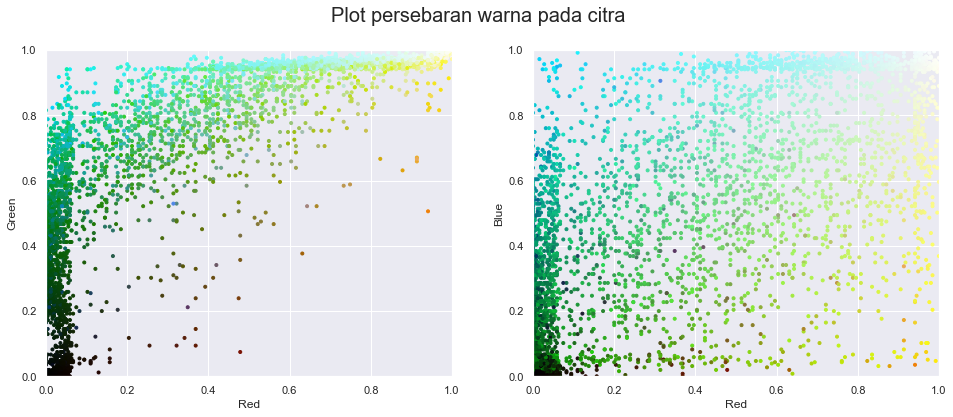

In [ ]:
# Menampilkan Plot Persebaran Warna pada Citra
plot_pixels(norm_image, title='Plot persebaran warna pada citra')

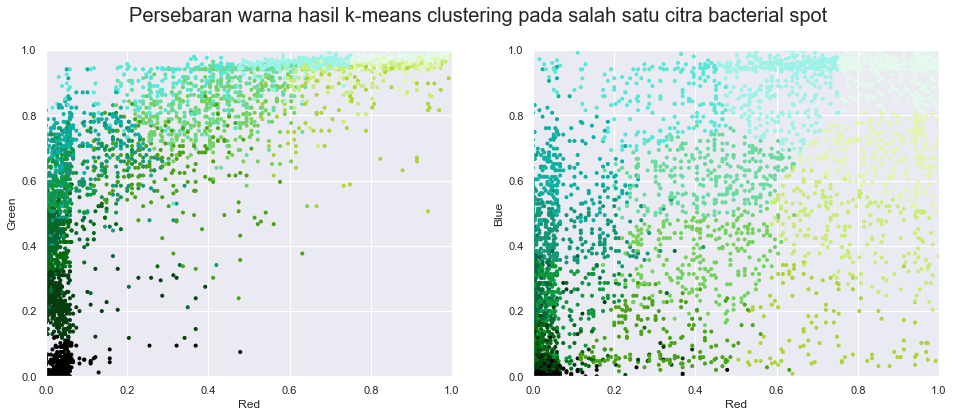

In [ ]:
# Mengimport Warning Untuk Mengabaikan Error
import warnings; warnings.simplefilter('ignore')

# Memilih Jumlah Cluster pada K-Means pada Citra
kmeans = MiniBatchKMeans(16)
kmeans.fit(norm_image)
new_colors = kmeans.cluster_centers_[kmeans.predict(norm_image)]

# Menampilkan Scatter Plot Persebaran Warna Hasil K-Means Clustering
plot_pixels(norm_image, colors=new_colors,
            title="Persebaran warna hasil k-means clustering pada salah satu citra bacterial spot")

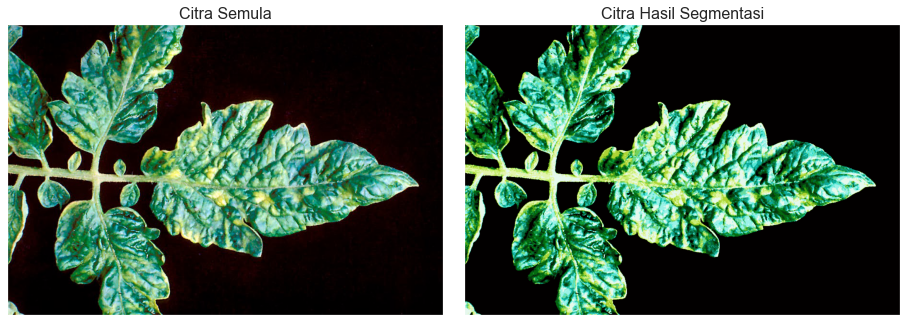

In [ ]:
# Mengembalikan Ukuran Citra ke Ukuran Semula
daun_kmeans = new_colors.reshape(norm_image.shape)
daun_kmeans = daun_kmeans.reshape(baris,kolom,3)

# Menampilkan Perbandingan Citra Asal dengan Citra Hasil Segmentasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(daun)
ax[0].set_title('Citra Semula', size=16)
ax[1].imshow(daun_kmeans)
ax[1].set_title('Citra Hasil Segmentasi', size=16);

In [ ]:
# Mencari Background Citra dari Modus Warna pada Tepian Citra
back_B = []
back_G = []
back_R = []

# Mendefinisikan Tepian Citra
tepi_kolom = [0,1,2,kolom-3,kolom-2,kolom-1]
tepi_baris = [0,1,2,baris-3,baris-2,baris-1]

# Membuat List Berisi Warna-warna BGR dari Tepian Citra
for i in range(baris):
    for j in tepi_kolom:
        back_B.append(daun_kmeans[i,j,0])
        back_G.append(daun_kmeans[i,j,1])
        back_R.append(daun_kmeans[i,j,2])
for i in tepi_baris:
    for j in range(kolom):
        back_B.append(daun_kmeans[i,j,0])
        back_G.append(daun_kmeans[i,j,1])
        back_R.append(daun_kmeans[i,j,2])

# Mencari Modus dari Ruang Warna BGR dari Tepian Citra
modus_B = mode(back_B)
modus_G = mode(back_G)
modus_R = mode(back_R)

Text(0.5, 1.0, 'Citra hasil k-means tanpa background')

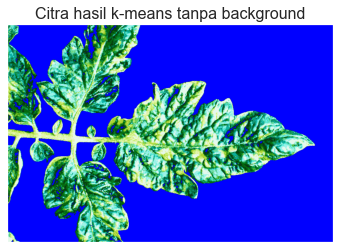

In [ ]:
# Membuat Citra Hasil K-Means Tanpa Background
tanpa_back = np.zeros([baris,kolom,3])

for i in range(baris):
    for j in range(kolom):
        tanpa_back[i,j,2] = 1

for i in range(baris):
    for j in range(kolom):
        if abs(daun_kmeans[i,j,0] - modus_B) <= 0.15 and abs(daun_kmeans[i,j,1] - modus_G) <= 0.15 and abs(daun_kmeans[i,j,2] - modus_R) <= 0.15:
            continue
        else:
            tanpa_back[i,j] = daun_kmeans[i,j]

# Menampilkan Citra Hasil K-Means Tanpa Background
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(tanpa_back);
ax.set_title('Citra hasil k-means tanpa background', size=16)

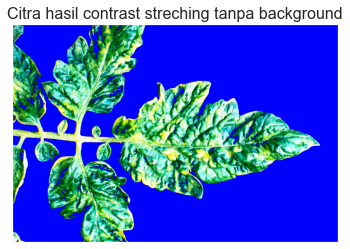

In [ ]:
# Citra Hasil Contrast Streching Tanpa Background
for i in range(baris):
    for j in range(kolom):
        if tanpa_back[i,j,0] == 0 and tanpa_back[i,j,1] == 0 and tanpa_back[i,j,2] == 1:
            contrass_image[i,j,0] = 0
            contrass_image[i,j,1] = 0
            contrass_image[i,j,2] = 255
        else:
            continue

# Menampilkan Citra Hasil Contrast Streching Tanpa Background
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(contrass_image)
ax.set_title('Citra hasil contrast streching tanpa background', size=16);

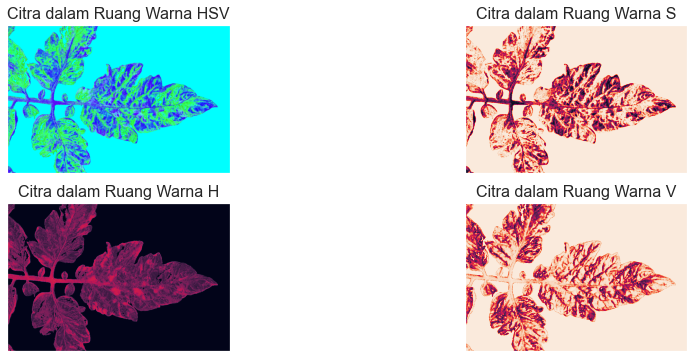

In [ ]:
# Mengubah Citra ke dalam Ruang Warna HSV
HSV = cv.cvtColor(contrass_image, cv.COLOR_BGR2HSV)

# Mencari Masing-masing Komponen Ruang Warna HSV
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

# Menampilkan Perbandingan Masing-Masing Komponen Ruang Warna HSV
fig, ax = plt.subplots(2, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Menampilkan Citra dalam Ruang Warna HSV
ax[0,0].imshow(HSV)
ax[0,0].set_title('Citra dalam Ruang Warna HSV', size=16)

# Menampilkan Citra Masing-masing Komponen
ax[1,0].imshow(np.uint8(H))
ax[1,0].set_title('Citra dalam Ruang Warna H', size=16);
ax[0,1].imshow(np.uint8(S))
ax[0,1].set_title('Citra dalam Ruang Warna S', size=16)
ax[1,1].imshow(np.uint8(V))
ax[1,1].set_title('Citra dalam Ruang Warna V', size=16);

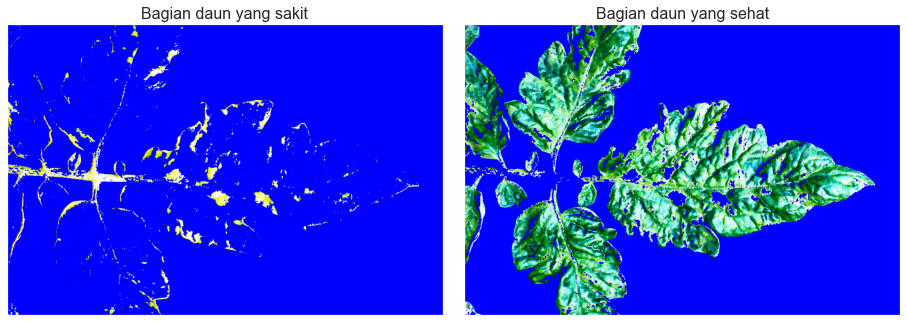

In [ ]:
# Mendeteksi Bagian Daun Berpenyakit dengan Nilai H yang Berada pada Rentang 80 <= Value <= 175
sakit = np.zeros([baris,kolom,3])
sehat = np.zeros([baris,kolom,3])

for i in range(baris):
    for j in range(kolom):
        sakit[i,j,2] = 255
        sehat[i,j,2] = 255

for i in range(baris):
    for j in range(kolom):
        if H[i,j] >= 80 and H[i,j] <= 175:
            sakit[i,j,:] = contrass_image[i,j,:]
        else:
            sehat[i,j,:] = contrass_image[i,j,:]

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(np.uint8(sakit))
ax[0].set_title('Bagian daun yang sakit', size=16);
ax[1].imshow(np.uint8(sehat))
ax[1].set_title('Bagian daun yang sehat', size=16);

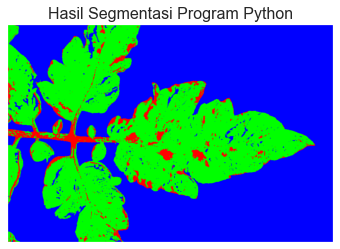

In [ ]:
# Melakukan Thresholding
hasil = np.zeros([baris,kolom,3])

for i in range(baris):
    for j in range(kolom):
        hasil[i,j,2] = 255

for i in range(baris):
    for j in range(kolom):
        if sehat[i,j,2] == 255 and sakit[i,j,2] == 255:
            hasil[i,j,2] = 255
        elif sehat[i,j,0] != 0 or sehat[i,j,1] !=0:
            hasil[i,j,1] = 255
            hasil[i,j,2] = 0
        elif sakit[i,j,0] != 0 or sakit[i,j,1] !=0:
            hasil[i,j,0] = 255
            hasil[i,j,2] = 0

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(np.uint8(hasil))
ax.set_title('Hasil Segmentasi Program Python', size=16);

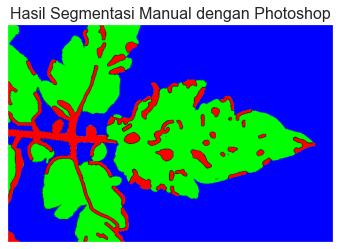

In [ ]:
# Melakukan Thresholding pada Citra Segmentasi Manual
manual_fix = np.zeros([baris,kolom,3])
manual = cv.cvtColor(manual, cv.COLOR_BGR2RGB)

for i in range(baris):
    for j in range(kolom):
        if manual[i,j,0] >= 240 and manual[i,j,1] >= 240 and manual[i,j,2] >= 240:
            manual_fix[i,j,2] = 255
        elif manual[i,j,1] >= 200:
            manual_fix[i,j,1] = 255
        elif manual[i,j,2] >= 200:
            manual_fix[i,j,0] = 255

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(np.uint8(manual_fix))
ax.set_title('Hasil Segmentasi Manual dengan Photoshop', size=16);

In [ ]:
# Menghitung Tingkat Akurasi dan Tingkat Presisi Secara Manual
[True_Back, True_Sehat, True_Sakit, False_Back1, False_Back2, False_Sehat1, False_Sehat2, False_Sakit1, False_Sakit2 ] = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(baris):
    for j in range(kolom):
        if manual_fix[i,j,2] == 255 and hasil[i,j,2] == 255:
            True_Back += 1
        elif manual_fix[i,j,1] == 255 and hasil[i,j,1] == 255:
            True_Sehat += 1
        elif manual_fix[i,j,0] == 255 and hasil[i,j,0] == 255:
            True_Sakit += 1
        elif manual_fix[i,j,1] == 255 and hasil[i,j,2] == 255:
            False_Back1 += 1
        elif manual_fix[i,j,0] == 255 and hasil[i,j,2] == 255:
            False_Back2 += 1
        elif manual_fix[i,j,2] == 255 and hasil[i,j,1] == 255:
            False_Sehat1 += 1
        elif manual_fix[i,j,0] == 255 and hasil[i,j,1] == 255:
            False_Sehat2 += 1
        elif manual_fix[i,j,2] == 255 and hasil[i,j,0] == 255:
            False_Sakit1 += 1
        elif manual_fix[i,j,1] == 255 and hasil[i,j,0] == 255:
            False_Sakit2 += 1

akurasi = (True_Back + True_Sehat + True_Sakit)/(True_Back + True_Sehat + True_Sakit + False_Back1 + False_Back2 + False_Sehat1 + False_Sehat2 + False_Sakit1 + False_Sakit2)
presisi = (True_Back/(True_Back + False_Back) + True_Sehat/(True_Sehat + False_Sehat) + True_Sakit/(True_Sakit + False_Sakit))/3
recall = (True_Back/(True_Back + False_Sehat1 + False_Sakit1) + True_Sehat/(True_Sehat + False_Back1 + False_Sakit2) + True_Sakit/(True_Sakit + False_Back2 + False_Sehat2))/3
f1_score = (2*recall*presisi)/(recall + presisi)

print('Akurasi : ', akurasi)
print('Presisi : ', presisi)
print('Recall : ', recall)
print('F1 Score : ', f1_score)

Akurasi :  0.9280033362680136
Presisi :  0.8754060715946778
Recall :  0.7878467746620373
F1 Score :  0.8293217132652141


In [ ]:
# Membuat Vektor Satu Dimensi pada Citra Hasil
vector_hasil=[]
for i in range(baris):
    for j in range(kolom):
        if hasil[i,j,2] == 255 and hasil[i,j,1] == 0 and hasil[i,j,0] == 0:
            vector_hasil.append(0)
        elif hasil[i,j,2] == 0 and hasil[i,j,1] == 255 and hasil[i,j,0] == 0:
            vector_hasil.append(1)
        elif hasil[i,j,2] == 0 and hasil[i,j,1] == 0 and hasil[i,j,0] == 255:
            vector_hasil.append(2)
        else:
            vector_hasil.append(0)
vector_hasil=np.array(vector_hasil)

In [ ]:
# Membuat Vektor Satu Dimensi pada Citra Segmentasi Manual
vector_manual=[]
for i in range(baris):
    for j in range(kolom):
        if manual_fix[i,j,2] == 255 and manual_fix[i,j,1] == 0 and manual_fix[i,j,0] == 0:
            vector_manual.append(0)
        elif manual_fix[i,j,2] == 0 and manual_fix[i,j,1] == 255 and manual_fix[i,j,0] == 0:
            vector_manual.append(1)
        elif manual_fix[i,j,2] == 0 and manual_fix[i,j,1] == 0 and manual_fix[i,j,0] == 255:
            vector_manual.append(2)
        else:
            vector_manual.append(0)
vector_manual=np.array(vector_manual)

In [ ]:
# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(vector_manual, vector_hasil))

[[310651   6733   1139]
 [  9706 172027   3367]
 [  4802  20682  19628]]


In [ ]:
# Menghitung Presisi pada masing-masing Bagian Background (0), Bagian Sehat (1), dan Bagian Sakit (2)
from sklearn.metrics import classification_report
print(classification_report(vector_manual,vector_hasil))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    318523
           1       0.86      0.93      0.89    185100
           2       0.81      0.44      0.57     45112

    accuracy                           0.92    548735
   macro avg       0.88      0.78      0.81    548735
weighted avg       0.91      0.92      0.91    548735

